# Libraries and Data

In [1]:
# Load libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load dataset and create DataFrame
df = pd.read_csv('D600 Task 3 Dataset 1 Housing Information.csv')
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [4]:
# Data Wrangling
# Map 'Fireplace' values: 'No': 0, 'Yes': 1
df['Fireplace'] = df['Fireplace'].map({'No': 0, 'Yes': 1})

# Map 'Garage' values: 'No': 0, 'Yes': 1
df['Garage'] = df['Garage'].map({'No': 0, 'Yes': 1})

# Change data type of 'Fireplace' and 'Garage' to int
df['Fireplace'] = df['Fireplace'].astype(int)
df['Garage'] = df['Garage'].astype(int)

# Drop unnecessary columns
df.drop(columns=['HouseColor'], axis=1, inplace=True)

# Review DataFrame
df.head().T

,0,1,2,3,4
ID,4922.0000,5009.00000,4450.000000,1070.000000,400.000000
Price,255614.8992,155586.09470,131050.832400,151361.712500,113167.612800
SquareFootage,566.6200,1472.34000,550.000000,941.810000,550.000000
NumBathrooms,1.0000,1.00000,1.779354,2.035254,1.064644
NumBedrooms,4.0000,2.00000,3.000000,2.000000,3.000000
BackyardSpace,779.4200,656.13000,754.570000,439.590000,353.030000
CrimeRate,20.5600,15.62000,12.470000,22.220000,8.280000
SchoolRating,5.6200,5.63000,9.200000,7.080000,5.930000
AgeOfHome,39.4600,40.51000,48.380000,94.670000,16.800000
DistanceToCityCenter,10.0800,7.89000,23.740000,5.220000,43.130000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

# D. Data Preparation Summary

## D1. Variable Identification

In [6]:
# Identify the continuous variables needed to answer pricing predictions
X = df[['SquareFootage', 'NumBathrooms', 'NumBedrooms',
        'BackyardSpace', 'CrimeRate', 'SchoolRating', 'AgeOfHome',
        'DistanceToCityCenter', 'EmploymentRate', 'PropertyTaxRate',
        'RenovationQuality', 'LocalAmenities', 'TransportAccess',
        'PreviousSalePrice']]

## D2. Standardized Data

In [7]:
# Standardize the data to adjust for varying units
scaler = StandardScaler()

# Fit and transform the data to standardize it
X_scaled = scaler.fit_transform(X)

# Place the data in a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head().T

,0,1,2,3,4
SquareFootage,-1.132277,0.993926,-1.171293,-0.251508,-1.171293
NumBathrooms,-1.187828,-1.187828,-0.369602,-0.100938,-1.119960
NumBedrooms,0.970213,-0.986989,-0.008388,-0.986989,-0.008388
BackyardSpace,0.957151,0.516683,0.868372,-0.256932,-0.566178
CrimeRate,-0.591776,-0.865854,-1.040621,-0.499677,-1.273088
SchoolRating,-0.700696,-0.695399,1.195478,0.072604,-0.536502
AgeOfHome,-0.230889,-0.197846,0.049814,1.506508,-0.943973
DistanceToCityCenter,-0.615042,-0.797175,0.521008,-1.019229,2.133599
EmploymentRate,0.794367,-0.109066,0.641205,-0.501960,-1.600730
PropertyTaxRate,0.681094,-1.104064,0.741268,-0.101167,-0.482268


In [8]:
# Save the standardized dataset to a new CSV file
X_scaled_df.to_csv('D600 Task 3 Dataset 1 Housing Information - Standardized.csv', index=False)

## D3. Descriptive Statistics

In [9]:
# Descriptive statistics of dependent variable
y = df['Price']
y.describe().T

count    7.000000e+03
mean     3.072820e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793230e+05
75%      3.918781e+05
max      1.046676e+06
Name: Price, dtype: float64

In [10]:
# Descriptive statistics of independent variables
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFootage,7000.0,1048.947459,426.010482,550.000000,660.815000,996.320000,1342.292500,2.874700e+03
NumBathrooms,7000.0,2.131397,0.952561,1.000000,1.290539,1.997774,2.763997,5.807239e+00
NumBedrooms,7000.0,3.008571,1.021940,1.000000,2.000000,3.000000,4.000000,7.000000e+00
BackyardSpace,7000.0,511.507029,279.926549,0.390000,300.995000,495.965000,704.012500,1.631360e+03
CrimeRate,7000.0,31.226194,18.025327,0.030000,17.390000,30.385000,43.670000,9.973000e+01
SchoolRating,7000.0,6.942923,1.888148,0.220000,5.650000,7.010000,8.360000,1.000000e+01
AgeOfHome,7000.0,46.797046,31.779701,0.010000,20.755000,42.620000,67.232500,1.786800e+02
DistanceToCityCenter,7000.0,17.475337,12.024985,0.000000,7.827500,15.625000,25.222500,6.520000e+01
EmploymentRate,7000.0,93.711349,4.505359,72.050000,90.620000,94.010000,97.410000,9.990000e+01
PropertyTaxRate,7000.0,1.500437,0.498591,0.010000,1.160000,1.490000,1.840000,3.360000e+00


In [11]:
# Descriptive statistics of scaled independent variables
X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFootage,7000.0,0.000000e+00,1.000071,-1.171293,-0.911152,-0.123544,0.688636,4.286005
NumBathrooms,7000.0,1.299278e-16,1.000071,-1.187828,-0.882798,-0.140288,0.664152,3.859180
NumBedrooms,7000.0,1.624098e-16,1.000071,-1.965590,-0.986989,-0.008388,0.970213,3.906016
BackyardSpace,7000.0,-1.624098e-17,1.000071,-1.826027,-0.752080,-0.055526,0.687749,4.000810
CrimeRate,7000.0,2.030122e-16,1.000071,-1.730810,-0.767652,-0.046671,0.690400,3.800691
SchoolRating,7000.0,-6.171571e-16,1.000071,-3.560846,-0.684806,0.035528,0.750565,1.619204
AgeOfHome,7000.0,-4.060244e-17,1.000071,-1.472336,-0.819514,-0.131447,0.643081,4.150208
DistanceToCityCenter,7000.0,3.248195e-16,1.000071,-1.453356,-0.802373,-0.153885,0.644302,3.969075
EmploymentRate,7000.0,2.931496e-15,1.000071,-4.808251,-0.686198,0.066293,0.821004,1.373718
PropertyTaxRate,7000.0,-3.491810e-16,1.000071,-2.989512,-0.682847,-0.020935,0.681094,3.729903


# E. Perform Principal Component Analysis (PCA)

## E1. Matrix Determination

In [12]:
# Be sure to work with the standardized data
df = pd.read_csv('D600 Task 3 Dataset 1 Housing Information - Standardized.csv')

# List of independent variables
independent_vars = [
    'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'BackyardSpace',
    'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter',
    'EmploymentRate', 'PropertyTaxRate', 'RenovationQuality',
    'LocalAmenities', 'TransportAccess', 'PreviousSalePrice'
]

In [13]:
# Initialize PCA with the number of components set to the number of
# variables
pca = PCA(n_components = len(independent_vars))

# Fit PCA to the standardized data and transform it
pca_components = pca.fit_transform(df[independent_vars])

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=pca_components,
                     columns=[f'PC{i+1}' for i in 
                              range(len(independent_vars))])

In [14]:
# Output the matrix of principal components
pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.899945,-0.321092,-1.554966,0.110730,-0.126251,1.589749,0.711681,-0.246433,-0.482176,-0.615057,-0.497830,-0.166842,0.855549,0.087778
1,-0.805220,0.664521,-0.877927,-1.689104,0.397888,-0.445135,-0.769102,-0.337006,-1.493831,0.257016,0.051287,0.448326,0.150981,-0.707251
2,-0.295618,1.875894,-1.665436,0.817241,0.487000,0.905630,0.049423,-0.321857,0.615564,-0.000373,0.813414,0.345321,-0.801561,-0.178838
3,-1.054050,0.084872,-0.199952,-0.177118,0.222900,-0.325076,-1.557940,-0.347143,-0.280309,-1.234242,0.789672,0.365198,-0.130226,-0.231017
4,-2.173687,1.055700,-0.579576,-0.130284,-1.017059,0.004817,-0.081007,-1.448811,0.955163,2.296010,0.369945,0.469296,0.343436,-0.280579
5,-1.235976,-2.412471,-0.490006,-0.667366,1.535381,0.045972,-0.366593,0.443276,-0.887939,0.491971,0.128089,-0.181225,1.000261,-0.465026
6,-1.447139,-0.318394,1.486552,-1.531248,-0.284258,1.503192,-0.523143,-1.084751,-0.893111,-0.027733,1.011282,0.086020,1.381223,-0.519727
7,-1.733073,0.584193,-0.120449,-1.477425,0.789963,-1.391373,0.528003,-0.092555,-0.608396,-0.962142,0.668784,0.103039,1.391509,1.014189
8,-2.009489,1.091419,-1.490719,2.958190,0.866654,0.985568,-0.269875,-0.969163,0.164839,0.362314,-0.862254,-0.177022,0.174861,-0.379520
9,-0.564468,2.710514,0.141519,1.114606,-0.041316,-0.688885,-0.668448,0.730248,-0.335990,1.015043,0.288209,0.316710,1.376069,0.191353


## E2. Total Principal Components

In [15]:
# Identify the variance of each of the principal components
explained_variance = pca.explained_variance_ratio_

# Print each principal component's explained variance
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")

Principal Component 1: 0.2310
Principal Component 2: 0.0969
Principal Component 3: 0.0809
Principal Component 4: 0.0761
Principal Component 5: 0.0722
Principal Component 6: 0.0668
Principal Component 7: 0.0656
Principal Component 8: 0.0645
Principal Component 9: 0.0604
Principal Component 10: 0.0592
Principal Component 11: 0.0438
Principal Component 12: 0.0366
Principal Component 13: 0.0328
Principal Component 14: 0.0131


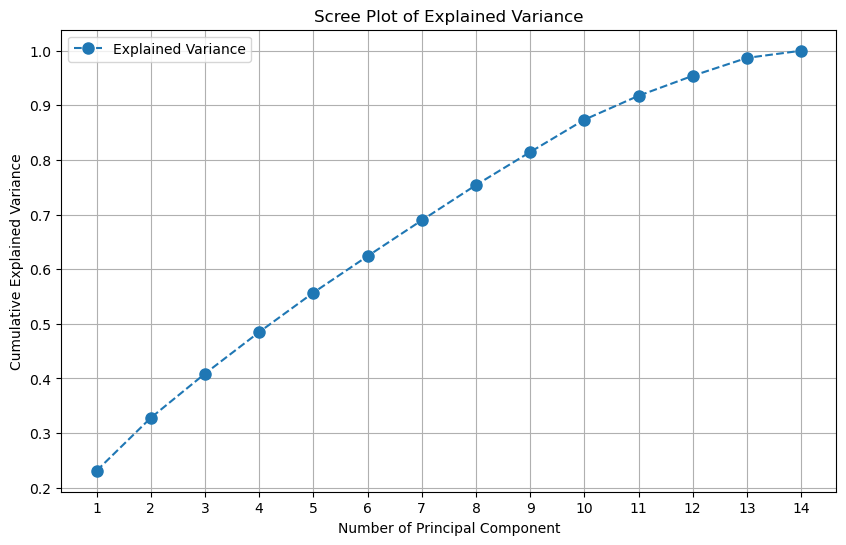

In [16]:
# Scree plot for visualizing variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance.cumsum(), 
         marker='o', markersize=8, label="Explained Variance", linestyle='--')
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Number of Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Identify Eigenvalues
eigenvalues = pca.explained_variance_
print(f"Eigenvalues:\n {eigenvalues}")

Eigenvalues:
 [3.23384649 1.35700378 1.13225984 1.06585231 1.01099575 0.93557991
 0.91907318 0.90364539 0.84622548 0.82939552 0.6134753  0.51193268
 0.45915282 0.18356185]


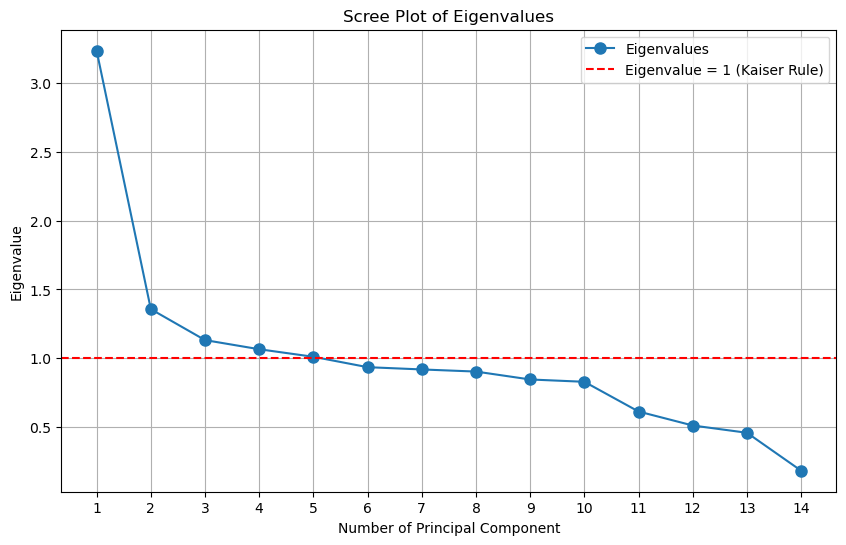

In [18]:
# Scree plot using the Kaiser Rule
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o',
         markersize=8, label="Eigenvalues")
plt.axhline(y=1, color='r', linestyle='--', 
            label='Eigenvalue = 1 (Kaiser Rule)')
plt.xticks(range(1, len(independent_vars) + 1))
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Number of Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)

In [19]:
# Find the Principal Components that should be retained based on the Kaiser Rule
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])
X_pca_df

,PC1,PC2,PC3,PC4,PC5
0,-0.899945,-0.321092,-1.554966,0.110730,-0.126251
1,-0.805220,0.664521,-0.877927,-1.689104,0.397888
2,-0.295618,1.875894,-1.665436,0.817241,0.487000
3,-1.054050,0.084872,-0.199952,-0.177118,0.222900
4,-2.173687,1.055700,-0.579576,-0.130284,-1.017059
...,...,...,...,...,...
6995,0.305374,-0.022458,-1.816575,-0.109783,0.282700
6996,1.669242,1.632416,2.030405,-0.190591,2.735052
6997,1.225342,-0.972373,-1.380511,0.674188,-2.063607
6998,2.434477,0.008076,-1.293639,-0.168930,-0.519733


## E3. Variance

In [20]:
# Extract the variance and explained variance ratio for each principal component
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Display the variance and the explained variance ratio for each component
print("Explained Variance of Each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: Variance = {variance:.4f}")

# Print proportions
print("\nProportion of Variance Explained by Each Principal Component:")
for i, variance_ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: Explained Variance Ratio = {variance_ratio:.4%}")

Explained Variance of Each Principal Component:
Principal Component 1: Variance = 3.2338
Principal Component 2: Variance = 1.3570
Principal Component 3: Variance = 1.1323
Principal Component 4: Variance = 1.0659
Principal Component 5: Variance = 1.0110

Proportion of Variance Explained by Each Principal Component:
Principal Component 1: Explained Variance Ratio = 23.0956%
Principal Component 2: Explained Variance Ratio = 9.6915%
Principal Component 3: Explained Variance Ratio = 8.0864%
Principal Component 4: Explained Variance Ratio = 7.6121%
Principal Component 5: Explained Variance Ratio = 7.2204%


In [21]:
# Print the cumulative explained variance for selecting components 
# via elbow rule
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative explained variance:", cumulative_explained_variance)

Cumulative explained variance: [0.23095604 0.32787103 0.40873518 0.48485661 0.55706028]


## E4. PCA Summary

See report for PCA summary.

# F. Data Analysis (Linear Regression)

## F1. Splitting the Data

In [22]:
# Create the dataset from the principal componenents remaining
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the dependent variable 'Price' back to the PCA DataFrame
housing_df = pd.concat([X_pca, y], axis=1)
housing_df

,PC1,PC2,PC3,PC4,PC5,Price
0,-0.899945,-0.321092,-1.554966,0.110730,-0.126251,255614.8992
1,-0.805220,0.664521,-0.877927,-1.689104,0.397888,155586.0947
2,-0.295618,1.875894,-1.665436,0.817241,0.487000,131050.8324
3,-1.054050,0.084872,-0.199952,-0.177118,0.222900,151361.7125
4,-2.173687,1.055700,-0.579576,-0.130284,-1.017059,113167.6128
...,...,...,...,...,...,...
6995,0.305374,-0.022458,-1.816575,-0.109783,0.282700,307821.1758
6996,1.669242,1.632416,2.030405,-0.190591,2.735052,421368.8869
6997,1.225342,-0.972373,-1.380511,0.674188,-2.063607,473382.5348
6998,2.434477,0.008076,-1.293639,-0.168930,-0.519733,343397.9756


In [23]:
# Split the data into a train_df and test_df to start
train_df, test_df = train_test_split(housing_df, test_size=0.3, random_state=42)

In [24]:
# Dataset shapes
print(f"Training dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Training dataset shape: (4900, 6)
Test dataset shape: (2100, 6)


In [25]:
# Export the data to CSV files
train_df.to_csv('D600 Task 3 Dataset 1 Housing Information - Train.csv', index=False)
test_df.to_csv('D600 Task 3 Dataset 1 Housing Information - Test.csv', index=False)

In [26]:
# Establish the dependent and independent variables to create the linear 
# regression model
y = housing_df['Price']
X = housing_df.drop('Price', axis=1)

# Resplit the data for testing and training data given variable splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## F2. Model Optimization

In [27]:
# Add a constant to the training set
X_train = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1726.
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:39:30   Log-Likelihood:                -62897.
No. Observations:                4900   AIC:                         1.258e+05
Df Residuals:                    4894   BIC:                         1.258e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.082e+05   1299.326    237.181      0.0

In [28]:
# Chosen Method: Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    while True:
        max_p_value = model.pvalues.max()
        if max_p_value >= significance_level:
            excluded_feature = model.pvalues.idxmax()
            X = X.drop(columns=[excluded_feature])
            model = sm.OLS(y, X).fit()
        else:
            break
    return model


# Perform backward elimination
optimized_model = backward_elimination(X_train, y_train)

# Summary of the optimized model
print(optimized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2157.
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:39:30   Log-Likelihood:                -62898.
No. Observations:                4900   AIC:                         1.258e+05
Df Residuals:                    4895   BIC:                         1.258e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.082e+05   1299.265    237.179      0.0

## F3. Mean Squared Error (MSE)

In [29]:
# Calculate Mean Squared Error (MSE) on the training set
# Use the features selected by the optimized model for prediction
y_train_pred = optimized_model.predict(optimized_model.model.exog)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")

Mean Squared Error (MSE) on Training Set: 8260974658.34


## F4. Model Accuracy

In [32]:
# Calculate Mean Squared Error (MSE) on the test set
# Use the features selected by the optimized model for prediction

# Add a constant to the test set (similar to what was done for the training set)
X_test = sm.add_constant(X_test)

# Use X_test instead of optimized_model.model.exog for prediction
y_test_pred = optimized_model.predict(X_test[optimized_model.model.exog_names])

# Calculate the Mean Squared Error (MSE) on the test dataset
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results for comparison
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set:     {mse_test:.2f}")

Mean Squared Error (MSE) on Training Set: 8260974658.34
Mean Squared Error (MSE) on Test Set:     8116119380.71


# G. Data Analysis Summary

## G3. Verification of Assumptions

In [31]:
# Calculate the Variance Inflation Factor (VIF) of the remaining coefficients
vif = pd.DataFrame()
vif["Features"] = optimized_model.model.exog_names
vif["VIF"] = [variance_inflation_factor(optimized_model.model.exog, i) for i in range(optimized_model.model.exog.shape[1])]
vif

,Features,VIF
0,const,1.000269
1,PC1,1.000016
2,PC2,1.000154
3,PC3,1.000166
4,PC4,1.000033
